## Airsim
# Step 0 - DataExplorationAndPreparation

Windows10, NVIDIA GeForce RTX 2080 SUPER

환경설정 : airsim_setting_anaconda.py(아나콘다환경) or airsim_setting_windows10.py(윈도우cmd 환경) 실행

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os
import Cooking
import random
import sys
import csv

BASE_PATH = 'D:\GTA_DATA1'

# << Point this to the directory containing the raw data >>
RAW_DATA_DIR = os.path.join(BASE_PATH, 'data_raw')

# << Point this to the desired output directory for the cooked (.h5) data >>
COOKED_DATA_DIR = os.path.join(BASE_PATH, 'data_cooked')

# The folders to search for data under RAW_DATA_DIR
DATA_FOLDERS = os.listdir(RAW_DATA_DIR)
print(DATA_FOLDERS)

# The size of the figures in this notebook
FIGURE_SIZE = (10,10)

['200421_111433', '200421_111951', '200421_112326', '200421_112708']


In [2]:
sample_tsv_path = os.path.join(RAW_DATA_DIR, DATA_FOLDERS[0], 'data.txt')
sample_tsv = pd.read_csv(sample_tsv_path, sep='\t')
sample_tsv

,Timestamp,Accelerator,Brake,Steering,ImageName
0,200421_111433_30,0,0,0,200421_111433_30.jpg
1,200421_111433_33,1,0,-600,200421_111433_33.jpg
2,200421_111433_37,1,0,-600,200421_111433_37.jpg
3,200421_111433_39,1,0,-600,200421_111433_39.jpg
4,200421_111433_43,1,0,-600,200421_111433_43.jpg
...,...,...,...,...,...
9125,200421_111918_46,0,0,2900,200421_111918_46.jpg
9126,200421_111918_49,0,0,2900,200421_111918_49.jpg
9127,200421_111918_51,0,0,2900,200421_111918_51.jpg
9128,200421_111918_55,0,0,2900,200421_111918_55.jpg


### Steering 값  10의 자리까지 버림

In [5]:
for cnt in range(0, len(DATA_FOLDERS)):    
    src = os.path.join(RAW_DATA_DIR, DATA_FOLDERS[cnt], 'data.txt')
    file = pd.read_csv(src, delimiter = '\t')
    df = DataFrame(file)
    df['Steering'] = round(df['Steering'], -2)
#     df['Steering'] = round(df['Steering']*0.01)
#     df['Steering'] = df['Steering']*100
    df.to_csv(src, sep = '\t', index = False)
df

,Timestamp,Accelerator,Brake,Steering,ImageName
0,200421_112708_60,32767,32767,-100,200421_112708_60.jpg
1,200421_112708_62,32767,32767,-300,200421_112708_62.jpg
2,200421_112708_66,23405,32767,-300,200421_112708_66.jpg
3,200421_112708_68,16384,32767,-300,200421_112708_68.jpg
4,200421_112708_73,-2560,32767,-300,200421_112708_73.jpg
...,...,...,...,...,...
8299,200421_113128_00,32767,32767,-400,200421_113128_00.jpg
8300,200421_113128_04,32767,32767,-400,200421_113128_04.jpg
8301,200421_113128_07,32767,32767,-400,200421_113128_07.jpg
8302,200421_113128_10,32767,32767,-400,200421_113128_10.jpg


### 엑셀 브레이크값 변경 (32767 = no input)  ★한번만 실행할것

In [6]:
for cnt in range(0, len(DATA_FOLDERS)):    
    src = os.path.join(RAW_DATA_DIR, DATA_FOLDERS[cnt], 'data.txt')
    file = pd.read_csv(src, delimiter = '\t')
    df = DataFrame(file)
    
    for i in range(0, len(df.Accelerator)):
        if df.Accelerator[i] == 32767 or df.Accelerator[i] == 0:
            df.Accelerator[i] = 0
        else:
            df.Accelerator[i] = 1
        
        if df.Brake[i] == 32767 or df.Brake[i] == 0:
            df.Brake[i] = 0
        else:
            df.Brake[i] = 1
    df.to_csv(src, sep = '\t', index = False)
df

C:\Users\deveu\.conda\envs\airsim\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\deveu\.conda\envs\airsim\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\deveu\.conda\envs\airsim\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.

,Timestamp,Accelerator,Brake,Steering,ImageName
0,200421_112708_60,0,0,-100,200421_112708_60.jpg
1,200421_112708_62,0,0,-300,200421_112708_62.jpg
2,200421_112708_66,1,0,-300,200421_112708_66.jpg
3,200421_112708_68,1,0,-300,200421_112708_68.jpg
4,200421_112708_73,1,0,-300,200421_112708_73.jpg
...,...,...,...,...,...
8299,200421_113128_00,0,0,-400,200421_113128_00.jpg
8300,200421_113128_04,0,0,-400,200421_113128_04.jpg
8301,200421_113128_07,0,0,-400,200421_113128_07.jpg
8302,200421_113128_10,0,0,-400,200421_113128_10.jpg


### Sample Image

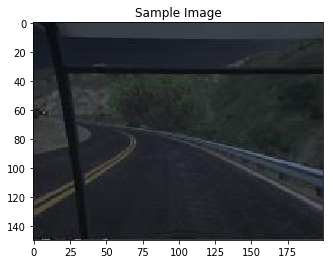

In [3]:
images_path = os.path.join(RAW_DATA_DIR, DATA_FOLDERS[0], 'images')
image_list = os.listdir(images_path)
sample_image_path = os.path.join(images_path, image_list[1000])
sample_image = Image.open(sample_image_path)
plt.title('Sample Image')
plt.imshow(sample_image)
plt.show()

One immediate observation that we can make about this image is that **only a small portion of the image is of interest**. For example, we should be able to determine how to steer the car by just focusing on the ROI of the image shown in red below

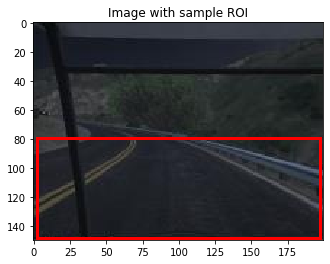

In [4]:
sample_image_roi = sample_image.copy()

fillcolor=(255,0,0)
draw = ImageDraw.Draw(sample_image_roi)
# points = [(1,76), (1,135), (255,135), (255,76)]

# 800,600
# points = [(5,350), (5,590), (795,590), (795,350)]

#200,150
points = [(2,80), (2,148), (198,148), (198,80)]

for i in range(0, len(points), 1):
    draw.line([points[i], points[(i+1)%len(points)]], fill=fillcolor, width=2)
del draw

plt.title('Image with sample ROI')
plt.imshow(sample_image_roi)
plt.show()

In [5]:
full_path_raw_folders = [os.path.join(RAW_DATA_DIR, f) for f in DATA_FOLDERS]
dataframes = []
for folder in full_path_raw_folders:
    current_dataframe = pd.read_csv(os.path.join(folder, 'data.txt'), sep='\t')
    current_dataframe['Folder'] = folder
    dataframes.append(current_dataframe)
    
dataset = pd.concat(dataframes, axis=0)

print('Number of data points: {0}'.format(dataset.shape[0]))

# dataset.head()

Number of data points: 28926


Let us now address the naming of the dataset folders. You will notice that we have two types of folders in our dataset - 'normal', and 'swerve'. These names refer to two different driving strategies. Let's begin by attempting to get an understanding of the differences between these two styles of driving. First, we'll plot a portion of datapoints from each of the driving styles against each other.

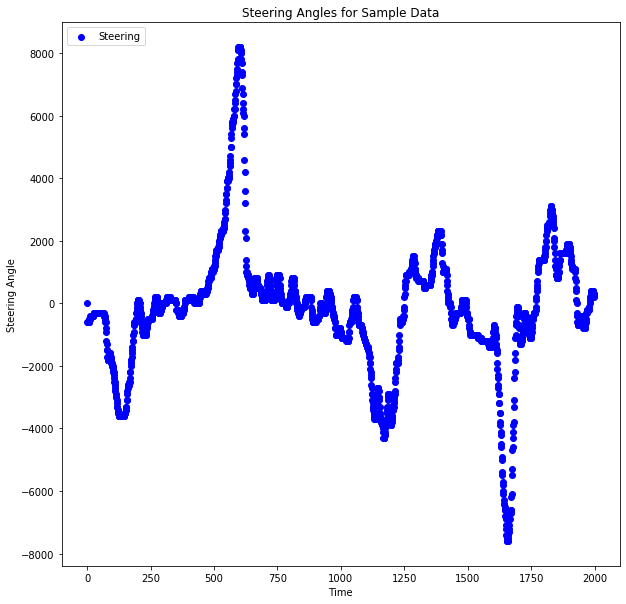

In [6]:
min_index = 0
max_index = 2000
steering_angles_1 = dataset[dataset['Folder'].apply(lambda v: DATA_FOLDERS[0] in v)]['Steering'][min_index:max_index]

plot_index = [i for i in range(min_index, max_index, 1)]

fig = plt.figure(figsize=FIGURE_SIZE)
ax1 = fig.add_subplot(111)
ax1.scatter(plot_index, steering_angles_1, c='b', marker='o', label='Steering')
plt.legend(loc='upper left');
plt.title('Steering Angles for Sample Data')
plt.xlabel('Time')
plt.ylabel('Steering Angle')
plt.show()

In [7]:
train_eval_test_split = [0.7, 0.2, 0.1]
full_path_raw_folders = [os.path.join(RAW_DATA_DIR, f) for f in DATA_FOLDERS]

Cooking.cook(full_path_raw_folders, COOKED_DATA_DIR, train_eval_test_split)

Reading data from D:\GTA_DATA1\data_raw\200421_111433...
Reading data from D:\GTA_DATA1\data_raw\200421_111951...
Reading data from D:\GTA_DATA1\data_raw\200421_112326...
Reading data from D:\GTA_DATA1\data_raw\200421_112708...
Processing D:\GTA_DATA1\data_cooked\train.h5...
Finished saving D:\GTA_DATA1\data_cooked\train.h5.
Processing D:\GTA_DATA1\data_cooked\eval.h5...
Finished saving D:\GTA_DATA1\data_cooked\eval.h5.
Processing D:\GTA_DATA1\data_cooked\test.h5...
Finished saving D:\GTA_DATA1\data_cooked\test.h5.
